*Authors-Yasha Ballal(yashaash) and  Abhinav Neelakantan(aneelaka)*
# Getting the data

In [ ]:

#load necessary libraries

library(rtweet)
library(ggmap)
library(revgeo)
library(stringr)

 # create twitter token with API keys. Insert keys to run code
twitter_token <- create_token(
  app = "FluTweets",
  consumer_key = "" ,
  consumer_secret = "" ,
  access_token = "" ,
  access_secret = ""
)

#==================FUNCTION DECLARATION========================
#function to remove NA values from columns
removeNA <- function(data, desiredCols) {
  completeVec <- complete.cases(data[, desiredCols])
  return(data[completeVec, ])
}

#==================VARIABLE DECLARATION========================
rt3<-NULL
#==================TWEET SEARCHING=============================

#function to search tweets
#q is search term, n is number of tweets to collect, not considering retweets


while(TRUE)
{
  rtuserdata <- search_tweets(
    q = "flu",
    n = 20000,
    include_rts = FALSE
  )
  #adding lat_long columns to data
  
  rtuserdata<-lat_lng(rtuserdata)
  
  #Removing the tweets that do not have the country name specified
  rtuserdata<-removeNA(rtuserdata,"country")
  
  #Removing the tweets where the country name is not United States
  rtuserdata<-rtuserdata[rtuserdata$country=="United States",]
  
  #Binding the data to a separate data frame
  if(is.null(rt3))
  {
    rt3<-rtuserdata
  } else {
    rt3<-rbind(rt3,rtuserdata)
  }
  
  #removing same tweets that might be re-collected or multiple tweets from the same user
  rt3<-rt3[!duplicated(rt3$user_id),]
}
#Name Of file to be changed every time this part is run
save(rt3, rtflu, rtinfluenza, file="DataFinal1.Rdata")


# EXTRACTING THE STATES

In [ ]:
#load necessary libraries
library(ggmap)
library(revgeo)
library(stringr)

# register google key to access API. enter API code to run code
register_google(key="")

#geocode funtion provides lat-long values


loc<-geocode(rt3$location)
loc<-data.frame(loc)

#store data in rt3 columns to access for reverse geocoding
rt3$lat<-loc$lat
rt3$lng<-loc$lon

# revgeo provides address from lat-long values
temp<-revgeo(rt3$lng, rt3$lat)

#split and extract state out of address
temp1<-strsplit(as.character(temp),",")
temp2<-data.frame(temp1)
region<-NULL
for(i in seq(1,ncol(temp2), by=1))
{
  region<-c(region,temp1[[i]][3])    
}
region<-str_trim(tolower(as.character(region)), "left")
finaltp<- as.data.frame(table(region))

library(ggplot2)
library(dplyr)


#create us state map variable

states_map<-map_data("state")
INFLUENZA<-merge(us_states,finaltp,by="region", all.x="TRUE")
INFLUENZA[is.na(INFLUENZA)]<-0

#=========================AN EXAMPLE PLOT=============================
ggplot(INFLUENZA, aes(map_id = INFLUENZA$region)) + 
  geom_map(aes(fill = INFLUENZA$Freq), map = states_map, colour="grey0") +
  scale_fill_gradientn(colours=c("green","yellow","red")) + 
  expand_limits(x = states_map$long, y = states_map$lat)+theme_map()


In [2]:
library(ggplot2)

# Base Plot
#used to define levels for the heat maps
fun1 <- function(x1){
    y<-vector()
    for(x in x1)
    {
        if(x=='Level 10')
        {
            y<-c(y,10)
        }
        else if(x=='Level 9')
        {
            y<-c(y,9)
        }
        else if(x=='Level 8')
        {
            y<-c(y,8)
        }
        else if(x=='Level 7')
        {
            y<-c(y,7)
        }
        else if(x=='Level 6')
        {
            y<-c(y,6)
        }
        else if(x=='Level 5')
        {
            y<-c(y,5)
        }
        else if(x=='Level 4')
        {
            y<-c(y,4)
        }
        else if(x=='Level 3')
        {
            y<-c(y,3)
        }
        else if(x=='Level 2')
        {
            y<-c(y,2)
        }
        else if(x=='Level 1')
        {
            y<-c(y,1)
        }
    }
    return(y)
}



In [25]:
install.packages("stringr", repos= "http://cran.us.r-project.org")

Installing package into 'C:/Users/Yasha Ballal/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'stringr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yasha Ballal\AppData\Local\Temp\RtmpY9LH2d\downloaded_packages


# Plot of CDC vs Twitter data

In [3]:
#load libraries

library(ggplot2)
library(dplyr)
library(ggmap)
library(gridExtra)
library(revgeo)

#read cdc data for states
fulldata<-read.csv("StateDataforMap_2018-19week6.csv")
fulldata$region <- tolower(fulldata$STATENAME)

# plot heat map
us_states<-map_data("state")
INFLUENZA<-merge(us_states,fulldata,by="region")
INFLUENZA$activity<- as.character(INFLUENZA$ACTIVITY.LEVEL)
INFLUENZA$LEVEL <- fun1(INFLUENZA$activity)
states_map <- map_data("state")
plot1<-ggplot(INFLUENZA, aes(map_id = INFLUENZA$region)) + 
  geom_map(aes(fill = INFLUENZA$LEVEL), map = states_map, colour="grey0") +
  scale_fill_gradientn(colours=c("green","yellow","red")) + 
  expand_limits(x = states_map$long, y = states_map$lat)+coord_fixed(ratio=1.75)

load("DataFinal.Rdata")
rt3<-rt3[rt3$country=="United States",]
region<-NULL

temp<-revgeo(rt3$lng, rt3$lat)
temp1<-strsplit(as.character(temp),",")


[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-84.5398123&lat=39.13703785"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-88.16058&lat=44.6342799"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-118.125196&lat=34.583629"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-122.63090815&lat=45.53640175"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=0.314299500000004&lat=42.308346"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-95.4464865&lat=29.8384948"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-96.79699&lat=32.84536"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-73.9685415&lat=40.780709"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-118.4089901&lat=34.0060125"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?

ERROR: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 5, 6


# Plot of CDC vs Twitter data for keyword "flu"

Warning message:
"package 'stringr' was built under R version 3.5.2"

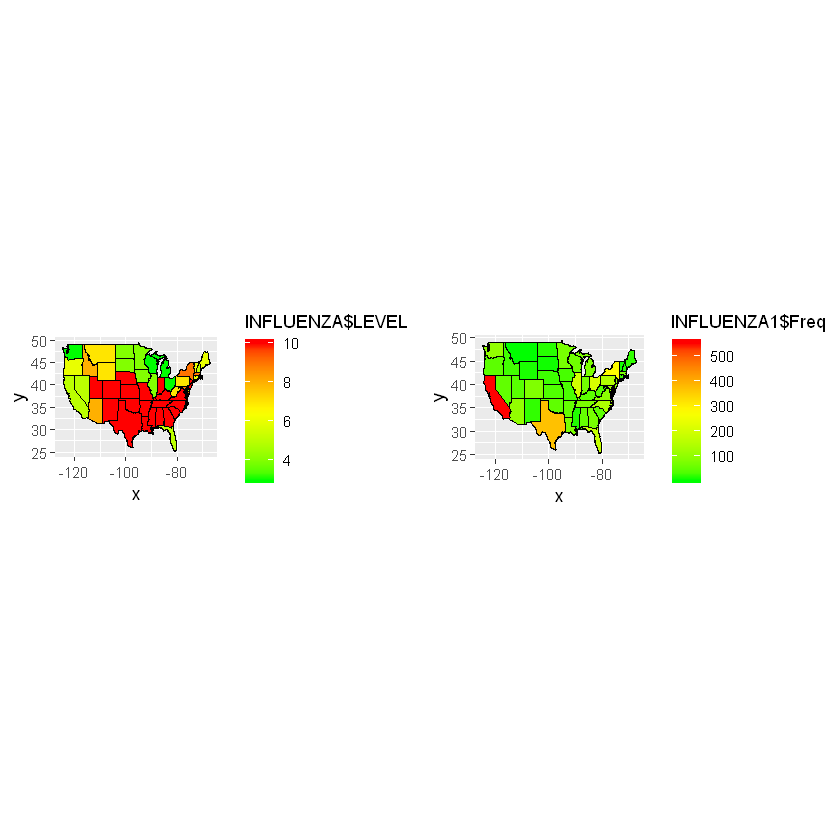

In [5]:
#load library

library(stringr)

#get first 3078 states and form data to create heat map
for(i in seq(1,3078, by=1))
{
  region<-c(region,temp1[[i]][3])    
}
region<-str_trim(tolower(as.character(region)), "left")
region<-str_trim(region,"right")
finaltp<- as.data.frame(table(region))

library(ggplot2)
library(dplyr)


states_map<-map_data("state")
INFLUENZA1<-merge(us_states,finaltp,by="region", all.x="TRUE")
INFLUENZA1[is.na(INFLUENZA1)]<-0

#=========================AN EXAMPLE PLOT=============================
plot2<-ggplot(INFLUENZA1, aes(map_id = INFLUENZA1$region)) + 
  geom_map(aes(fill = INFLUENZA1$Freq), map = states_map, colour="grey0") +
  scale_fill_gradientn(colours=c("green","yellow","red")) + 
  expand_limits(x = states_map$long, y = states_map$lat)+coord_fixed(ratio=1.75)

#arrange plots side by side
grid.arrange(plot1, plot2, ncol=2)



[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-91.7608235&lat=37.9478235"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-73.972455&lat=40.8483335"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-116.238001&lat=43.598033"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-116.238001&lat=43.598033"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-90.2109935&lat=41.8569045"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-90.2109935&lat=41.8569045"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-86.441236&lat=39.7665555"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-119.025163&lat=35.3469013"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-94.1821622&lat=42.5070585"
[1] "Getting geocode data from Photon: http://photon.komoot.de/reverse?lon=-8

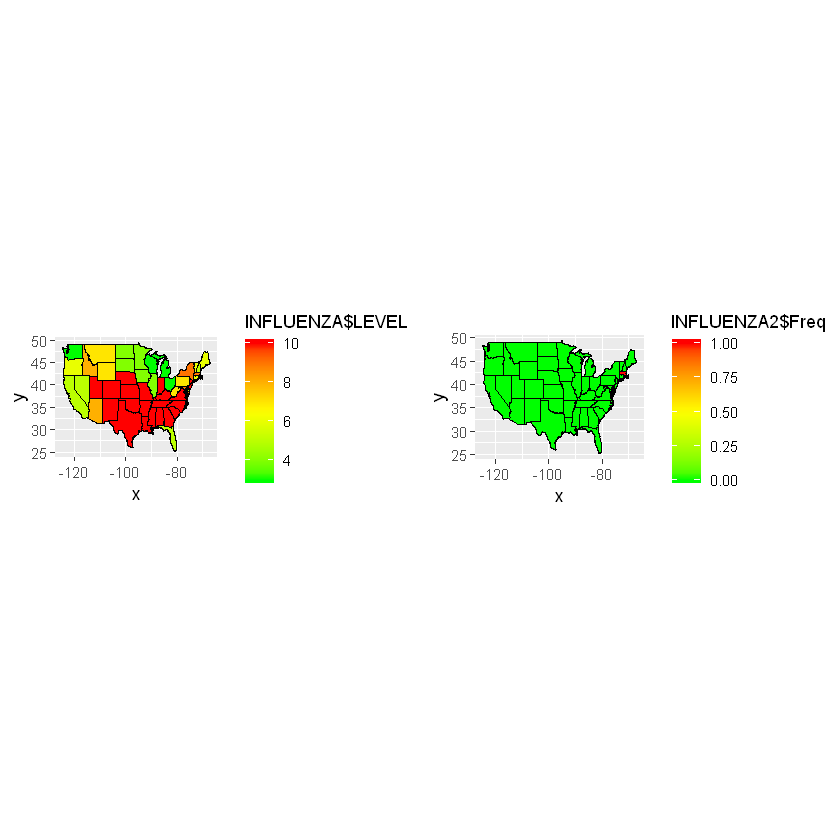

In [6]:




rtflu<-rtflu[rtflu$country=="United States",]
region<-NULL
#obtain state from lat long
temp<-revgeo(rtflu$lng, rtflu$lat)
temp1<-strsplit(as.character(temp),",")
temp2<-data.frame(temp1)



#extraact first 481 state values and compare to form data for heat map
for(i in seq(1,481, by=1))
{
  region<-c(region,temp1[[i]][3])    
}
region<-str_trim(tolower(as.character(region)), "left")
region<-str_trim(region,"right")
finaltp<- as.data.frame(table(region))

library(ggplot2)
library(dplyr)

#plot heat map

states_map<-map_data("state")
INFLUENZA2<-merge(us_states,finaltp,by="region", all.x="TRUE")
INFLUENZA2[is.na(INFLUENZA2)]<-0

#=========================AN EXAMPLE PLOT=============================
plot3<-ggplot(INFLUENZA2, aes(map_id = INFLUENZA2$region)) + 
  geom_map(aes(fill = INFLUENZA2$Freq), map = states_map, colour="grey0") +
  scale_fill_gradientn(colours=c("green","yellow","red")) + 
  expand_limits(x = states_map$long, y = states_map$lat)+coord_fixed(ratio=1.75)
# arrange plot side by side
grid.arrange(plot1, plot3, ncol=2)